# Quantitative Phase (QP) Workflow Demo
This notebook demonstrates a 3D/4D-ready pipeline:

1. **QP retrieval** on 3D data only (from a specified brightfield channel if 4D)
2. **Segmentation** using all available data
3. **Focal plane determination** using the 3D QP data
4. **Dry mass conversion** from QP

> Replace the QP retrieval stub with your own method if available.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import the library
import sys
sys.path.append('/mnt/data')
import quantphase_pipeline as qpp
from tpr import phase_structure



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.6 
platform:       	win32 
python version: 	3.11.13 
torch version:  	2.7.1+cu118! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




## Load or synthesize data
Provide either a 3D array `(z,y,x)` or a 4D array `(c,z,y,x)`.
Below we synthesize a simple 4D dataset with two channels.

In [2]:
import os
from tkinter import filedialog
from tkinter import *

from skimage import io

def select_file(filepath=""):
    if not os.path.exists(filepath):
        # ask for user input for calibraiton
        root = Tk()
        root.withdraw()
        pathobject = filedialog.askopenfile(title='Select volumetric brightfield data', filetypes =[('image file', ['*.tif', '*.tiff'])])
        filepath = pathobject.name
        root.destroy()
    ht = os.path.split(filepath)
    path, fname = ht[0], ht[1]
    print(f"Selected file: {fname} from path {path}")
    return path, fname

def load_data(filename):
    return io.imread(filename)


In [3]:
# rng = np.random.default_rng(0)
# c, z, y, x = 2, 16, 128, 128
# base = rng.normal(loc=0.5, scale=0.12, size=(z, y, x)).astype(np.float32)
# # Add a bright, in-focus plane around z=7 for channel 0 (brightfield-like)
# yy, xx = np.indices((y,x))
# for k in range(z):
#     strength = np.exp(-0.5*((k-7)/2.0)**2)
#     base[k] += strength * 0.5 * np.exp(-(((yy-64)**2 + (xx-64)**2)/(2*20.0**2)))
# ch0 = np.clip(base, 0, 1)
# ch1 = np.clip(rng.normal(loc=0.45, scale=0.12, size=(z,y,x)), 0, 1)
# data4d = np.stack([ch0, ch1], axis=0)  # (c,z,y,x)
# print('Synthetic data shape:', data4d.shape)

In [4]:
path, filename = select_file()
stack = load_data(os.path.join(path, filename))
print(f"Finished loading, shape: {stack.shape}, dtype: {stack.dtype}")

path_out = os.path.join(path, "QP")
file_id = filename.split('.')[0] 
file_out = file_id + "_QP.tif"


Selected file: stack_450_1.tif from path F:/irene/v1_20251022
Finished loading, shape: (200, 1024, 1024, 3), dtype: uint16


## Configure and run the pipeline

In [5]:
s=phase_structure()

# either write a metadata parser or set variables explicitly here
# 40x water immersion
dz = 0.160  # z step size in microns
pixelsize = 0.165 # pixel size in microns

# 60x water immersion
#dz = 0.1  # z step size in microns
#pixelsize = 0.102 # pixel size in microns

s.optics_dz = dz
s.optics_dx = pixelsize
s.optics_NA = 1.2 # numerical aperture
s.optics_NA_ill = 0.26 # illumination NA
s.optics_dlambda = 0.04
s.optics_wv = 0.55 # wavelength in microns
s.optics_alpha = 4.21 
phase_structure.summarise(s)


Phase structure: 
_________________
s.optics_dx = 0.165 	 	 s.optics_wv = 0.55
s.optics_dz = 0.16 	 	 s.optics_dlambda = 0.04
s.optics_NA = 1.2 	 	 s.optics_alpha = 4.21
s.optics_NA_ill = 0.26 	 	 s.optics_kzT = 0.01
s.optics_n = 1.406
Processing paramters: 
_________________
s.proc_mirrorX = False 	 	 s.proc_mirrorZ = False
s.proc_applyFourierMask = True


Stack shape after permutation: (1024, 1024, 200)
Stack shape after cropping: (1024, 1024, 200)
Inverted stack for QP retrieval
Stack shape after permutation: (1024, 1024, 200)
Stack shape after cropping: (1024, 1024, 200)
Inverted stack for QP retrieval
Stack shape after permutation: (1024, 1024, 200)
Stack shape after cropping: (1024, 1024, 200)
Inverted stack for QP retrieval
Updated shape: (1024, 1024, 200)
creating new log file
2025-11-05 12:15:38,010 [INFO] WRITING LOG OUTPUT TO C:\Users\LocalAdmin\.cellpose\run.log
2025-11-05 12:15:38,011 [INFO] 
cellpose version: 	4.0.6 
platform:       	win32 
python version: 	3.11.13 
torch version:  	2.7.1+cu118
2025-11-05 12:15:38,250 [INFO] ** TORCH CUDA version installed and working. **
>>> GPU activated? YES
2025-11-05 12:15:38,251 [WARNING] model_type argument is not used in v4.0.1+. Ignoring this argument...
2025-11-05 12:15:38,252 [INFO] ** TORCH CUDA version installed and working. **
2025-11-05 12:15:38,253 [INFO] >>>> using GPU (CUDA

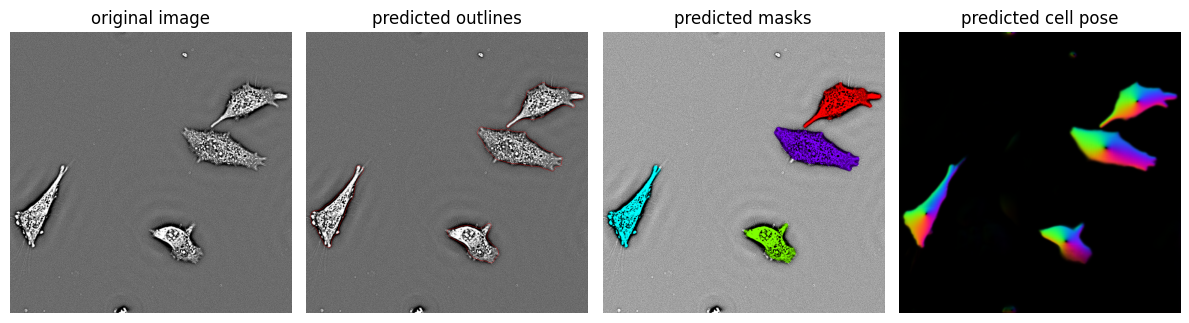

Processing region 1/4
Processing region 2/4
Processing region 3/4
Processing region 4/4
Saved cell image to F:/irene/v1_20251022\QP\stack_450_1_cell_1.png
Saved cell image to F:/irene/v1_20251022\QP\stack_450_1_cell_2.png
Saved cell image to F:/irene/v1_20251022\QP\stack_450_1_cell_3.png
Saved cell image to F:/irene/v1_20251022\QP\stack_450_1_cell_4.png
Saved dry mass data to F:/irene/v1_20251022\QP\stack_450_1_cell_data.csv


(91,
 [(3.666688438722546e-11, 4.920064e-10),
  (3.891385515941347e-11, 6.890752000000001e-10),
  (5.146825100851341e-11, 4.710400000000001e-10),
  (3.368787449720217e-11, 3.7729280000000006e-10)])

In [6]:
cfg = qpp.PipelineConfig(
    channel_bf=0,
    seg_reduce='focal',
    model_type='cyto',
    wavelength_m=550e-9,
    alpha_m3_per_g=0.18e-6,
    pixel_size_m=160e-9,
    ps=s,
    flow_threshold=0.4,
    cell_threshold=-1.0, 
    invert_stack = True, 
    overwrite_qp=False
)

outputs = qpp.run_pipeline(stack, cfg, filename=filename, path_save=path_out)
outputs.z_focal, [(f['mass'], f['area']) for f in outputs.dry_masses.values()]

## Visualize QP and segmentation at the focal plane

In [ ]:
z_star = outputs.z_focal
phi = outputs.phi_3d[:,:,z_star]
mask = outputs.seg_mask

fig, ax = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)
ax[0].imshow(phi)
ax[0].set_title(f'QP φ at z={z_star}')
ax[0].axis('off')

ax[1].imshow(mask)
ax[1].set_title('Segmentation mask (z*)')
ax[1].axis('off')
plt.show()

## Focus metric across z (from QP)

In [ ]:
scores = [qpp.compute_fourier_sharpness(outputs.phi_3d[:,:,k]) for k in range(outputs.phi_3d.shape[2])]
plt.figure(figsize=(6,4))
plt.plot(scores, marker='o')
plt.xlabel('z')
plt.ylabel('Variance of Laplacian (focus)')
plt.title('Focus metric over z (QP)')
plt.grid(True)
plt.show()

## Dry mass per slice and at focal plane

In [ ]:
masses = outputs.dry_mass_per_z
z_star = outputs.z_focal
m_star = outputs.dry_mass_at_focal

print(f'Focal plane z*: {z_star}\nDry mass at z*: {m_star:.3e} kg')

plt.figure(figsize=(6,4))
plt.plot(masses, marker='o')
plt.axvline(z_star, linestyle='--')
plt.xlabel('z')
plt.ylabel('Dry mass (kg)')
plt.title('Dry mass per z-slice')
plt.grid(True)
plt.show()

> **Note:** The QP retrieval here is a placeholder. Plug in your method via `PipelineConfig.qp_per_slice_fn` to get physically meaningful φ(x,y).